## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('results.csv',)
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [4]:
data.groupby(by='tournament').size()

tournament
ABCS Tournament                     20
AFC Asian Cup                      370
AFC Asian Cup qualification        724
AFC Challenge Cup                  100
AFC Challenge Cup qualification     92
                                  ... 
Viva World Cup                      56
WAFF Championship                   97
West African Cup                    54
Windward Islands Tournament        101
World Unity Cup                      4
Length: 112, dtype: int64

## Task
Which teams scored the largest number of goals in FIFA World Cup? - **DONE**

In [5]:
word_cup = data[data['tournament']== 'FIFA World Cup']

word_cup_goals_home = word_cup[['date', 'home_team','home_score']].rename(columns={'home_team' : 'team','home_score':'score'})
word_cup_goals_away = word_cup[['date', 'away_team','away_score']].rename(columns={'away_team' : 'team','away_score':'score'})

world_cup_gols = word_cup_goals_home.append(word_cup_goals_away)
world_cup_gols
teams = world_cup_gols.groupby('team').count()['score'].sort_values(ascending=False).head(10)
df = pd.DataFrame(teams)
df

,score
team,
Germany,109
Brazil,109
Italy,83
Argentina,81
England,69
France,66
Spain,63
Mexico,57
Uruguay,56


No handles with labels found to put in legend.


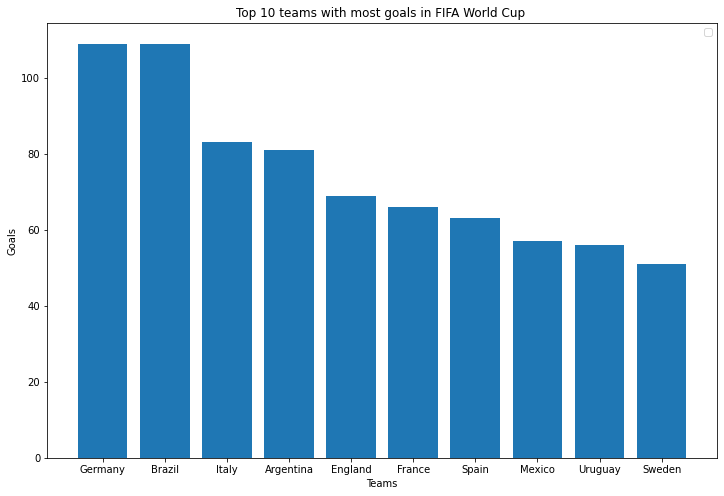

In [6]:
fig = plt.figure(figsize = (12,8))
plt.bar(df.index, df['score'])
plt.legend()
plt.title('Top 10 teams with most goals in FIFA World Cup ')
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.show()

## Task
What is the number of matches played in each tournament throughout history? **DONE**

In [7]:
tour = data.groupby(by='tournament').count()['date']
total_tour = pd.DataFrame(tour)
# total_tour.drop(total_tour.index['Friendly'])
# df.drop(df.index[[1,3]])
total_tour.head()

,date
tournament,
ABCS Tournament,20
AFC Asian Cup,370
AFC Asian Cup qualification,724
AFC Challenge Cup,100
AFC Challenge Cup qualification,92


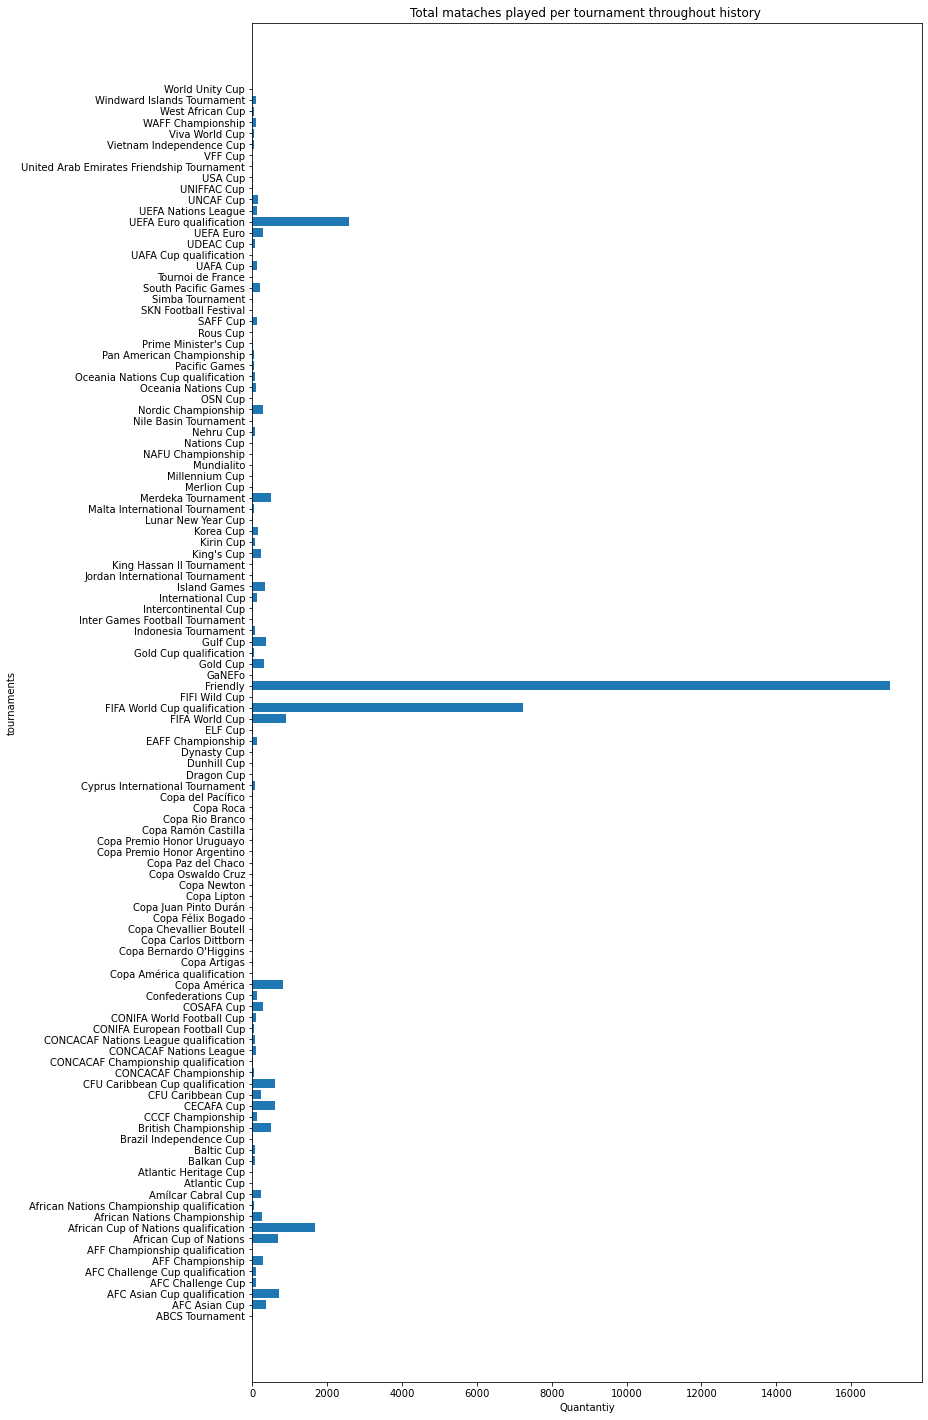

In [8]:
fig = plt.figure(figsize = (12,25))
plt.barh(total_tour.index, total_tour['date'], align='center')
plt.title('Total mataches played per tournament throughout history ')
plt.xlabel('Quantantiy')
plt.ylabel('tournaments')
plt.show()

## Task 
Show the trend in number of matches per year. **DONE**

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
df_plot = data['date'].dt.year.value_counts()\
                    .rename_axis('year')\
                    .to_frame('count_matches')\
                    .reset_index()\
                    .sort_values('year')
df_plot

,year,count_matches
147,1872,1
148,1873,1
146,1874,1
145,1875,1
142,1876,2
...,...,...
12,2016,926
10,2017,958
13,2018,905
0,2019,1155


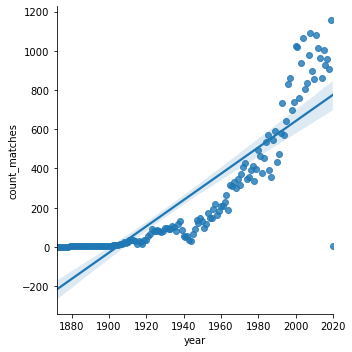

In [11]:
sns.lmplot(x='year', y='count_matches', data = df_plot)
plt.show()

## Task
Which teams are the most successful ones? (winning percentage) **DONE**

In [12]:
data2 = data.copy()

In [13]:
def winner(x):
    if x['home_score'] > x['away_score']:
        return x['home_team']
    elif x['home_score'] < x['away_score']:
        return x['away_team']
    else:
        return 'Tie'

data2['Winner'] = data2.apply(winner, axis=1)
data2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,Canada
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,Sweden
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,Iceland
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,Iceland


In [14]:
total_home = data2[['date', 'home_team','home_score']].rename(columns={'home_team' : 'team','home_score':'score'})
total_away = data2[['date', 'away_team','away_score']].rename(columns={'away_team' : 'team','away_score':'score'})

total_games = total_home.append(total_away)
total_games

,date,team,score
0,1872-11-30,Scotland,0
1,1873-03-08,England,4
2,1874-03-07,Scotland,2
3,1875-03-06,England,2
4,1876-03-04,Scotland,3
...,...,...,...
41581,2020-01-10,Canada,4
41582,2020-01-12,Sweden,1
41583,2020-01-15,Iceland,1
41584,2020-01-19,Iceland,1


In [15]:
# world_cup_gols - all games recorded in home and away into the same columns(date	team	score)
total_games_played_team2 = total_games['team'].value_counts()\
                    .rename_axis('team')\
                    .to_frame('count_matches')\
                    .reset_index()\
                    .sort_values('team')
# total_games_played_team2 = world_cup_gols.groupby(by='team').count()['date']\
#                     #.rename_axis('team')\
# #                     .to_frame('count_matches')\
# #                     .reset_index()\
# #                     .sort_values('team')
# total_games_played_team2

In [16]:
total_games_played_team2

,team,count_matches
240,Abkhazia,28
191,Afghanistan,111
109,Albania,332
252,Alderney,19
65,Algeria,505
...,...,...
71,Yugoslavia,480
21,Zambia,718
152,Zanzibar,205
76,Zimbabwe,456


In [17]:
# count total win per team #### CONTAR WIN --> NOW IS COUNTING EVERTHING
total_win_team = data2['Winner'].value_counts()\
                    .rename_axis('team')\
                    .to_frame('count_win')\
                    .reset_index()\
                    .sort_values('team')

In [18]:
test = pd.merge(total_games_played_team2, total_win_team, on='team')
test

,team,count_matches,count_win
0,Abkhazia,28,12
1,Afghanistan,111,30
2,Albania,332,84
3,Alderney,19,3
4,Algeria,505,214
...,...,...,...
295,Yugoslavia,480,223
296,Zambia,718,328
297,Zanzibar,205,41
298,Zimbabwe,456,189


In [19]:
test["%_win"] = (test["count_win"]/test["count_matches"]) * 100
df = test.sort_values('%_win', ascending=False).head(10)
df

,team,count_matches,count_win,%_win
251,Surrey,1,1,100.000000
16,Asturias,1,1,100.000000
47,Canary Islands,4,3,75.000000
294,Yorkshire,7,5,71.428571
196,Padania,43,29,67.441860
136,Jersey,82,55,67.073171
66,County of Nice,9,6,66.666667
203,Parishes of Jersey,3,2,66.666667
25,Basque Country,57,37,64.912281
36,Brazil,981,625,63.710499


No handles with labels found to put in legend.


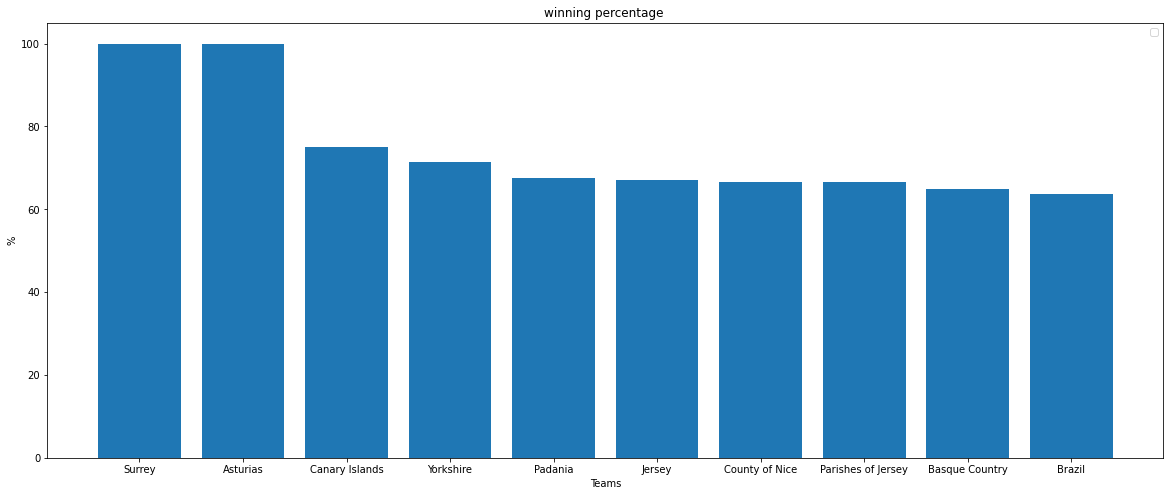

In [20]:
fig = plt.figure(figsize = (20,8))
plt.bar(df['team'], df['%_win'])
plt.legend()
plt.title('winning percentage ')
plt.xlabel('Teams')
plt.ylabel('%')
plt.show()

## Task
Which teams are the least successful ones? (winning percentage) **DONE**

In [21]:
df_loose = test.sort_values('%_win').head(10)
df_loose

,team,count_matches,count_win,%_win
227,San Marino,163,1,0.613497
7,Andorra,164,6,3.658537
76,Djibouti,88,4,4.545455
9,Anguilla,61,3,4.918033
152,Liechtenstein,198,15,7.575758
79,East Timor,51,4,7.843137
191,Northern Mariana Islands,24,2,8.333333
154,Luxembourg,402,34,8.457711
55,Chagos Islands,11,1,9.090909
241,Somalia,107,10,9.345794


No handles with labels found to put in legend.


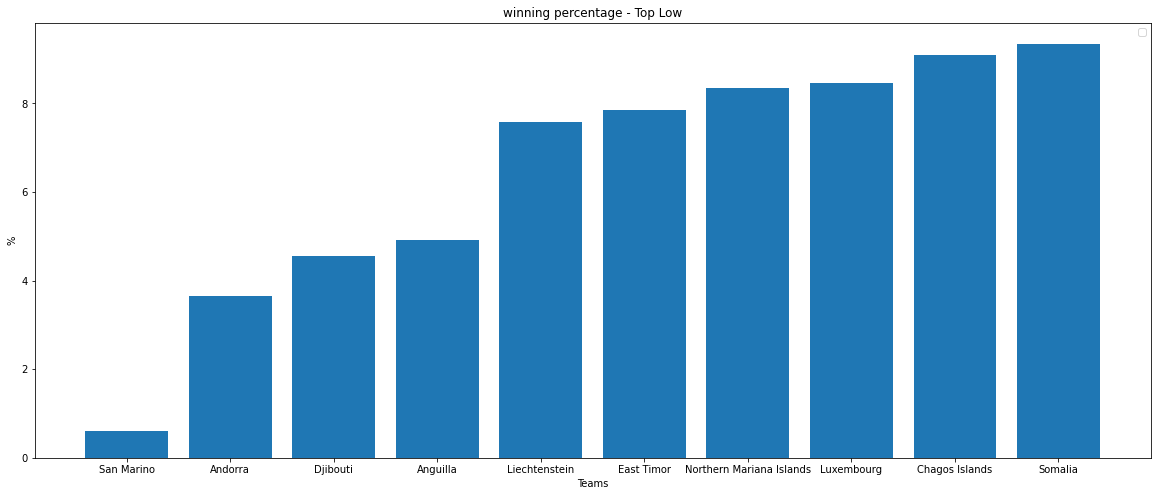

In [22]:
fig = plt.figure(figsize = (20,8))
plt.bar(df_loose['team'], df_loose['%_win'])
plt.legend()
plt.title('winning percentage - Top Low')
plt.xlabel('Teams')
plt.ylabel('%')
plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month? **DONE**

In [23]:
df_plot = data['date'].dt.month.value_counts()\
                    .rename_axis('month')\
                    .to_frame('count_games')\
                    .reset_index()\
                    .sort_values('count_games', ascending=False)
df_plot

,month,count_games
0,6,5969
1,10,4642
2,9,4296
3,11,4293
4,3,4039
5,5,3231
6,7,2770
7,8,2752
8,2,2564
9,4,2538


No handles with labels found to put in legend.


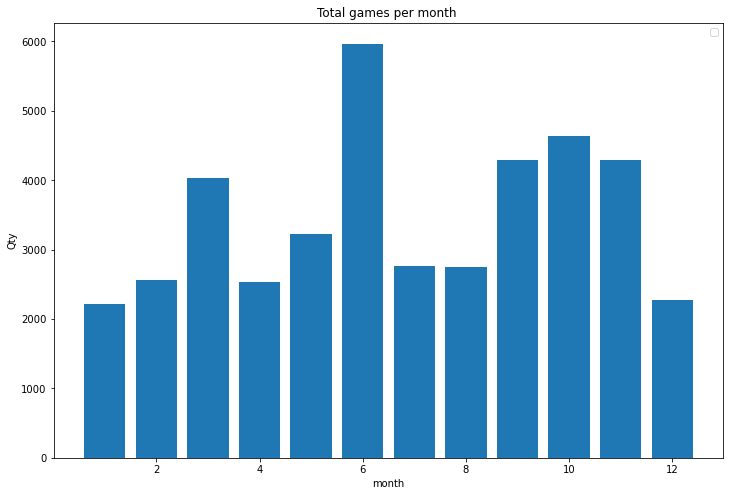

In [24]:
ig = plt.figure(figsize = (12,8))
plt.bar(df_plot.month, df_plot.count_games)
plt.legend()
plt.title('Total games per month ')
plt.xlabel('month')
plt.ylabel('Qty')
plt.show()

## Task
Which teams played against each other the most? **DONE**

In [25]:
confront = data2['home_team']+'/'+data2['away_team']

total_games = confront.value_counts().sort_values(ascending=False).head(10)
total_games

Argentina/Uruguay      96
Uruguay/Argentina      80
Austria/Hungary        68
Hungary/Austria        65
Kenya/Uganda           65
Belgium/Netherlands    63
Netherlands/Belgium    62
Argentina/Paraguay     62
Brazil/Paraguay        58
Argentina/Brazil       58
dtype: int64

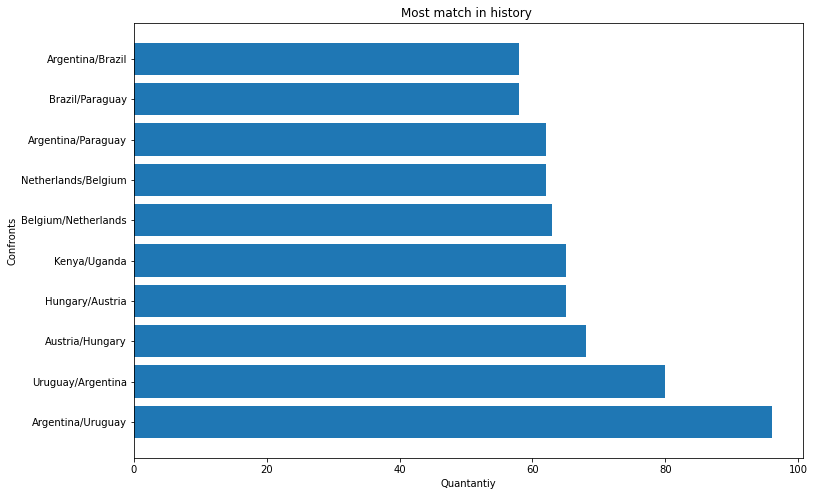

In [26]:
fig = plt.figure(figsize = (12,8))
plt.barh(total_games.index,total_games)
plt.title('Most match in history ')
plt.xlabel('Quantantiy')
plt.ylabel('Confronts')
plt.show()

## Task
Apply your creativity to show some additional insights from the data.

In [27]:
def goal(x):
    return x['home_score'] + x['away_score']

data2['total_goals'] = data2.apply(goal, axis=1)
data2



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3
...,...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,Canada,5
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,Sweden,1
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,Iceland,1
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,Iceland,1


In [58]:
df_plot = data2.groupby(by=data2['date'].dt.year).sum()['total_goals']\
                    .rename_axis('year')\
                    .to_frame('Total_gols_per_year')\
                    .reset_index()\
                    .sort_values('year')
df_plot

,year,Total_gols_per_year
0,1872,0
1,1873,6
2,1874,3
3,1875,4
4,1876,7
...,...,...
144,2016,2531
145,2017,2583
146,2018,2359
147,2019,3318


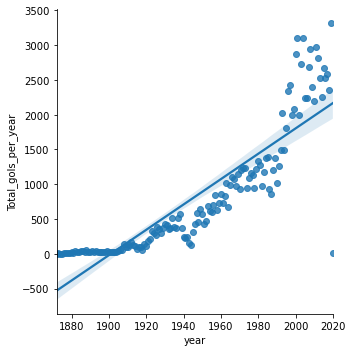

In [59]:
sns.lmplot(x='year', y='Total_gols_per_year', data = df_plot)
plt.show()

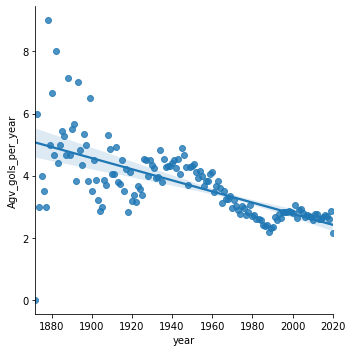

In [62]:
df_plot = data2.groupby(by=data2['date'].dt.year).mean()['total_goals']\
                    .rename_axis('year')\
                    .to_frame('Agv_gols_per_year')\
                    .reset_index()\
                    .sort_values('year')
df_plot

sns.lmplot(x='year', y='Agv_gols_per_year', data = df_plot)
plt.show()

## Task (Stretch)
Create these graphs in Tableau as well.